In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv(f"/Users/ehsanet/PycharmProjects/Fragmentation/examples/stable_baselines3/results/episode_data-{98}.csv ")

_range_s, _range_e = 0, len(data)
# _range_s, _range_e = 100, 140
episode_length = len(data)

# detecting changes
changes = []
for i in range(_range_s, _range_e):
    if i > 0 and data['Theta'][i] != data['Theta'][i-1]:
        changes.append(i)

rewards_beginning = []
SBR= []

#first scenario
# for i, row in data.iterrows():
#     SBR.append(row["SBR"])
#     shanon_difference = row["shanon_before"] - row["shanon_after"]
#     frag_difference = row["rfrag_difference"]
#     if row["Theta"] == 1 or row["Theta"]==2: # provisioning
#         reward = np.log(row["SBR"] + 0.001)/np.log(0.001) + np.exp(-row["shanon_before"])  # calculate!
#     elif row["Theta"] == 0 and data.iloc[i-1]["Theta"] == 1: # start of a cycle
#         reward = np.log(row["SBR"] + 0.001)/np.log(0.001) - 0.3
#           # calculate!
#     elif row["Theta"] == 0 and data.iloc[i-1]["Theta"] == 0: # reallocating
#         if shanon_difference >0 and frag_difference >0:
#             reward = 1-np.log(frag_difference )/np.log(0.001) + 1 - np.log(shanon_difference )/np.log(0.001)- 0.05
#         elif shanon_difference <0 and frag_difference <0:
#             reward = -1+np.log(-frag_difference )/np.log(0.001) - 1 + np.log(-shanon_difference )/np.log(0.001)- 0.05
#         elif shanon_difference >0 and frag_difference <0:
#             reward = -1+np.log(-frag_difference )/np.log(0.001) + 1 - np.log(shanon_difference )/np.log(0.001)- 0.05
#         elif shanon_difference <0 and frag_difference >0:
#             reward = +1-np.log(+frag_difference )/np.log(0.001) - 1 + np.log(-shanon_difference )/np.log(0.001)- 0.05
#         else:
#              reward = np.log(row["SBR"] + 0.001)/np.log(0.001) - 0.3 
#     rewards_beginning.append(reward)
    
## second senario
# count = 0
# for i, row in data.iterrows():
#     SBR.append(row["SBR"])
#     shanon_difference = row["shanon_before"] - row["shanon_after"]
#     frag_difference = row["rfrag_difference"]
#     if row["Theta"] == 1 or row["Theta"]==2: # provisioning
#         reward = np.log(row["SBR"] + 0.001)/np.log(0.001)  # calculate!
#         count = 0
#     elif row["Theta"] == 0 and data.iloc[i-1]["Theta"] == 1: # start of a cycle
#         count = count + 1
#         reward = np.log(row["SBR"] + 0.001)/np.log(0.001) - 0.3 - count*0.01
#           # calculate!
#     elif row["Theta"] == 0 and data.iloc[i-1]["Theta"] == 0: # reallocating
#         count +=1
#         if shanon_difference >0 and frag_difference >0:
#             reward = 1-np.log(frag_difference )/np.log(0.001) + 1 - np.log(shanon_difference )/np.log(0.001)- count*0.01
#         elif shanon_difference <0 and frag_difference <0:
#             reward = -1+np.log(-frag_difference )/np.log(0.001) - 1 + np.log(-shanon_difference )/np.log(0.001)- count*0.01
#         elif shanon_difference >0 and frag_difference <0:
#             reward = -1+np.log(-frag_difference )/np.log(0.001) + 1 - np.log(shanon_difference )/np.log(0.001)- count*0.01
#         elif shanon_difference <0 and frag_difference >0:
#             reward = +1-np.log(+frag_difference )/np.log(0.001) - 1 + np.log(-shanon_difference )/np.log(0.001)-count*0.01
#         else:
#              reward = np.log(row["SBR"] + 0.001)/np.log(0.001) - 0.3 
#     rewards_beginning.append(reward)
    
#Third scenario
    
count = 0
for i, row in data.iterrows():
    SBR.append(row["SBR"])
    shanon_difference = row["shanon_before"] - row["shanon_after"]
    frag_difference = row["rfrag_difference"]
    if row["Theta"] == 1 or row["Theta"]==2: # provisioning
        reward = np.log(row["SBR"] + 0.001)/np.log(0.001)  # calculate!
        count = 0
    elif row["Theta"] == 0 and data.iloc[i-1]["Theta"] == 1: # start of a cycle
        count = count + 1
        reward = np.log(row["SBR"] + 0.001)/np.log(0.001) - 0.3 - count*0.01
          # calculate!
    elif row["Theta"] == 0 and data.iloc[i-1]["Theta"] == 0: # reallocating
        count +=1
        reward = np.exp(row["rfrag_after"])/2.75 - np.exp(row["rfrag_before"])/2.75 + np.exp(-row["shanon_before"]) - np.exp(-row["shanon_after"]) - count*0.01
    rewards_beginning.append(reward)
    

    
    
rewards_beginning_array = np.array(rewards_beginning)   
cumulative_rewards = np.zeros(episode_length)
cumulative_rewards[episode_length-1] = rewards_beginning_array[episode_length-1]
for i in range(1, episode_length):
    cumulative_rewards[episode_length-1-i] = rewards_beginning_array[episode_length-1-i] + 0.99*cumulative_rewards[episode_length-i]

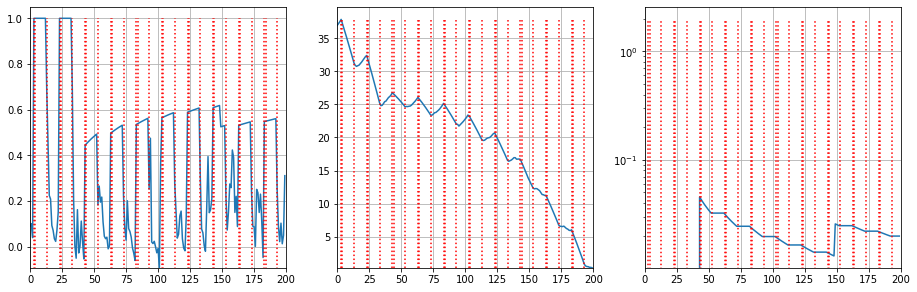

In [40]:
plt.figure(figsize=(15.6, 4.8))
plt.subplot(1, 3, 1)
# # plt.plot(data['rewards'])
# plt.vlines(changes, data['rewards'][_range_s:_range_e].min(), data['rewards'][_range_s:_range_e].max(), ls=":", color="red")
# plt.grid()
# plt.xlim([_range_s, _range_e])
# plt.ylim((data['rewards'][_range_s:_range_e].min()*.95, data['rewards'][_range_s:_range_e].max()*1.05))


plt.plot(rewards_beginning_array)
plt.vlines(changes, rewards_beginning_array[_range_s:_range_e].min(), rewards_beginning_array[_range_s:_range_e].max(),
           ls=":", color="red")
plt.grid()
plt.xlim([_range_s, _range_e])
plt.ylim((rewards_beginning_array[_range_s:_range_e].min()*.95, rewards_beginning_array[_range_s:_range_e].max()*1.05))

plt.subplot(1, 3, 2)
plt.plot(cumulative_rewards)
plt.vlines(changes, cumulative_rewards[_range_s:_range_e].min(), cumulative_rewards[_range_s:_range_e].max(), ls=":", color="red")
plt.grid()
plt.xlim([_range_s, _range_e])
plt.ylim((cumulative_rewards[_range_s:_range_e].min()*.95, cumulative_rewards[_range_s:_range_e].max()*1.05))
# plt.plot([100, 139], [59, 42])

# plt.subplot(1, 3, 3)
# plt.plot(data['Theta'][_range_s:_range_e])
# plt.vlines(changes, data['Theta'][_range_s:_range_e].min(), data['Theta'][_range_s:_range_e].max(), ls=":", color="red")
# # plt.text(0, 0, "Realocate")
# # ax.text(0, 1, "Provision")
# # ax.text(0, 2, "Finish cycle")
# plt.xlim([_range_s, _range_e])
# plt.grid()
plt.subplot(1, 3, 3)
plt.semilogy(data['SBR'][_range_s:_range_e])
plt.vlines(changes, data['Theta'][_range_s:_range_e].min(), data['Theta'][_range_s:_range_e].max(), ls=":", color="red")
# plt.text(0, 0, "Realocate")
# ax.text(0, 1, "Provision")
# ax.text(0, 2, "Finish cycle")
plt.xlim([_range_s, _range_e])
plt.grid()


$$
r = \frag{log(blocking)}{-6.907755278982137} - penalties
$$

-6.907755278982137 -6.907755278982137


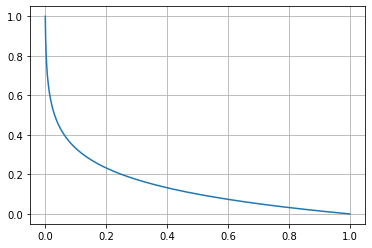

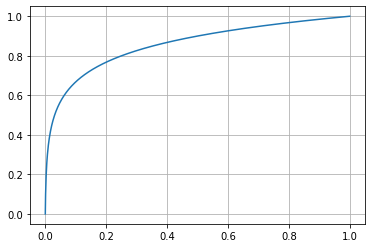

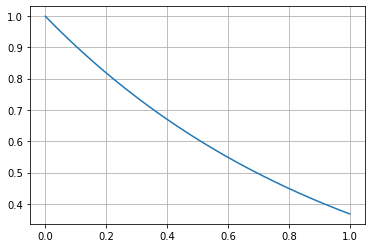

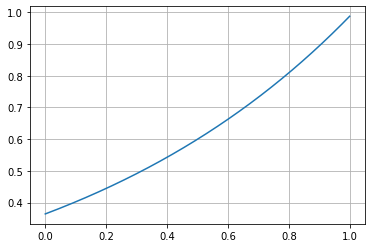

In [41]:
blocking = np.array([x for x in range(1, 1_000)]) / 1_000
exp = np.exp(-blocking)
exp_positive= np.exp(+blocking)/2.75
ne_blocking = np.log(blocking)
print(ne_blocking.min(), np.log(0.001))
plt.figure()
plt.plot(blocking, ne_blocking / ne_blocking.min())
plt.grid()
plt.show()
plt.figure()
plt.plot(blocking, 1 - ne_blocking / ne_blocking.min())
plt.grid()
plt.show()

plt.figure()
plt.plot(blocking, exp)
plt.grid()
plt.show()

plt.figure()
plt.plot(blocking, exp_positive)
plt.grid()
plt.show()

shall we use total sbr or episdoe sbr in the formulation?


episode SBR is not best, and it is zero in the begining of episode?